In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.shape

(42000, 785)

In [4]:
df=data.drop(['label'],axis=1)

In [5]:
import matplotlib.pyplot as plt

In [6]:
n=df.iloc[1,:]

In [7]:
n=np.array(n)

In [8]:
n=n.reshape(28,28)

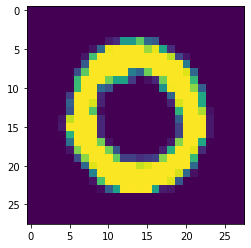

In [9]:
plt.imshow(n)

In [10]:
data.shape

(42000, 785)

In [11]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [12]:
data.pixel2.value_counts()

0    42000
Name: pixel2, dtype: int64

In [13]:
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## PCA implementation

In [14]:
from sklearn.decomposition import PCA

In [15]:
pc=PCA(n_components=.99)

In [16]:
x=pc.fit_transform(data.drop(['label'],axis=1))

In [17]:
pc.n_components_

331

In [18]:
x.shape

(42000, 331)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtr,xte,ytr,yte=train_test_split(x,data.label,test_size=.20,random_state=1)

In [21]:
xtr.shape,xte.shape

((33600, 331), (8400, 331))

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix

In [24]:
lr=LogisticRegression(C=1)

In [25]:
svm=SVC()

In [26]:
rd=RandomForestClassifier()

In [27]:
dt=DecisionTreeClassifier()

## Logistics regression

In [28]:
lr.fit(xtr,ytr)

D:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [29]:
pred_lr=lr.predict(xte)

In [30]:
lr.score(xte,yte)

0.9134523809523809

In [31]:
score_lr=pd.DataFrame([["Logistics Regression",accuracy_score(yte,pred_lr),r2_score(yte,pred_lr),confusion_matrix(yte,pred_lr)]])

In [32]:
score_lr.columns=['model','accuracy score','r2_score','confusion matrix']

In [33]:
score_lr

,model,accuracy score,r2_score,confusion matrix
0,Logistics Regression,0.913452,0.826239,"[[815, 0, 4, 1, 3, 11, 14, 1, 3, 1], [0, 911, ..."


In [34]:
confusion_matrix(yte,pred_lr)

array([[815,   0,   4,   1,   3,  11,  14,   1,   3,   1],
       [  0, 911,   3,   7,   0,   2,   4,   1,  11,   1],
       [  8,  10, 764,  11,   6,   4,   6,  10,  14,   2],
       [  3,   4,  23, 774,   0,  32,   2,  10,  16,   9],
       [  2,   4,   6,   0, 769,   1,   6,   3,   5,  33],
       [ 15,   4,   4,  26,   9, 630,  14,   8,  17,   4],
       [  7,   1,   2,   0,  10,  11, 766,   1,   1,   1],
       [  0,   4,   9,   5,   8,   0,   0, 783,   2,  39],
       [ 10,  22,  11,  31,   9,  27,   7,   2, 714,  13],
       [  3,   5,   2,   6,  32,   6,   0,  32,  10, 747]], dtype=int64)

## SVM

In [35]:
svm=SVC(C=10,gamma=.01)

In [ ]:
svm.fit(xtr,ytr)

In [ ]:
pred_svm=svm.predict(xte)

In [ ]:
svm.score(xte,yte)

In [ ]:
svm.score(xte,yte)

In [ ]:
score_svm=pd.DataFrame([["SVM",accuracy_score(yte,pred_svm),r2_score(yte,pred_svm),confusion_matrix(yte,pred_svm)]])

In [ ]:
score_svm.columns=['model','accuracy score','r2_score','confusion matrix']

In [ ]:
score_svm

In [ ]:
score_svm

In [ ]:
confusion_matrix(yte,pred_svm)

## Desicion Tree

In [ ]:
dt.fit(xtr,ytr)

In [ ]:
pred_dt=dt.predict(xte)

In [ ]:
dt.score(xte,yte)

In [ ]:
score_dt=pd.DataFrame([["Desicion Tree",accuracy_score(yte,pred_dt),r2_score(yte,pred_dt),confusion_matrix(yte,pred_dt)]])

In [ ]:
score_dt.columns=['model','accuracy score','r2_score','confusion matrix']

In [ ]:
score_dt

In [ ]:
confusion_matrix(yte,pred_dt)

 ## Random Forest

In [ ]:
rd=RandomForestClassifier(criterion='gini')

In [ ]:
rd.fit(xtr,ytr)

In [ ]:
pred_rd=rd.predict(xte)

In [ ]:
rd.score(xte,yte)

In [ ]:
score_rd=pd.DataFrame([["Random forest",accuracy_score(yte,pred_dt),r2_score(yte,pred_rd),confusion_matrix(yte,pred_rd)]])

In [ ]:
score_rd.columns=['model','accuracy score','r2_score','confusion matrix']

In [ ]:
score_rd

In [ ]:
confusion_matrix(yte,pred_rd)

In [ ]:
confusion_matrix(yte,pred_svm)

In [ ]:
score_pca=pd.concat([score_lr,score_svm,score_dt,score_rd],axis=0)

In [ ]:
#score_std.columns=['model','accuracy score','r2_score','f1_score','precision_score','recall score','roc_auc_score','confusion matrix']

In [ ]:
score_pca

In [ ]:
score

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
test.shape

In [ ]:
test.isnull().sum()

In [ ]:
te=pc.transform(test)

In [ ]:
te.shape

In [ ]:
pred=svm.predict(te)

In [ ]:
pred=pd.DataFrame(pred)

In [ ]:
pred.to_csv('result.csv')

In [ ]:
pred.shape